In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib
import numpy as np

In [2]:
#max_interval_time=timedelta(hours=3)
#min_interval_time=timedelta(seconds=0)
##Read origin data
df_types=pd.read_pickle('data/0to22data.pkl')

In [3]:
video_type=pd.read_pickle('data/0to22data_types.pkl')

In [4]:
#this is for filter the interval by eliminate the 14% longest watch interval which we consider as the outlier and don't belong to a session.
#interval_threhold=0.14

In [5]:
video_type=video_type.rename(columns={'name':'item'})

In [6]:
video_type

,item,Series,Shows,Videos,Movies
0,国产凌凌漆.mp4,False,False,False,True
1,千王之王2000.mp4,False,False,False,True
2,神奇四侠2(高清).mp4,False,False,False,True
3,蔡依林-花蝴蝶庆功演唱会.mp4,False,False,False,True
4,猛龙过江.mp4,False,False,False,True
...,...,...,...,...,...
44980,杰克逊私人医生被曝曾中断急救-3月24日.mp4,False,False,True,False
45498,万博百闻-6月30日.mp4,False,False,True,False
45588,服务世博 铁路虹桥站7月1日部分开通-3月24日.mp4,False,False,True,False
46111,央视大火案开审 公诉方提供70余册证据复印件-3月24日.mp4,False,False,True,False


In [7]:
df_types=df_types.join(video_type.set_index('item'), on='item')

In [8]:
#df.loc[df['user']=='11011110110011000101100010000010']

In [9]:
df_types

,time,user,item,Series,Shows,Videos,Movies
380964,2010-06-24 12:22:10,00101111100110100011000001011101,铁血军事-100306-太平洋战场.mp4,False,True,False,False
6643244,2010-07-09 12:34:35,00101111100110100011000001011101,父辈的旗帜(高清).mp4,False,False,False,True
6643432,2010-07-09 12:35:34,00101111100110100011000001011101,荣耀三九年.mp4,False,False,False,True
6662598,2010-07-09 14:12:05,00101111100110100011000001011101,父辈的旗帜(高清).mp4,False,False,False,True
14633928,2010-07-15 12:31:22,00101111100110100011000001011101,硫磺岛来信(高清).mp4,False,False,False,True
...,...,...,...,...,...,...,...
7152667,2010-07-09 17:03:10,11011110111110011111001000010001,星际迷航11DVD.mp4,False,False,False,True
7152678,2010-07-09 17:03:13,11011110111110011111001000010001,星际迷航10：复仇女神BD.mp4,False,False,False,True
7152679,2010-07-09 17:03:13,11011110111110011111001000010001,星舰迷航9：起义BD.mp4,False,False,False,True
7152695,2010-07-09 17:03:16,11011110111110011111001000010001,星舰迷航记7：星空奇兵BD.mp4,False,False,False,True


In [10]:
# #get the list of the User
# userlist=df['item'].drop_duplicates()
# userlist=userlist.iloc[::-1]
# userlist

In [11]:
#show single user data
#df.loc[df_short['user']==userlist.iloc[0]]
# df_types['item']=='胡须鸡仔(第31集).mp4'

In [12]:
##transfer the 'time' data from str to datatime for subsequent processing
df_types['time']=pd.to_datetime(df_types['time'])
df_types['interval']=df_types['time'].shift(-1)-df_types['time']#to get the watch interval by subtracting from row to row

In [13]:
#df_types['item'].values

In [14]:
# #to assumble the TV series
# Series_list=[]
# i=0
# df_movies=df_types.loc[df_types['Series']==True]
# list_old=df_movies['item'].values
# for i in range(len(list_old)):
#     Series_list.append([list_old[i],list_old[i].split('(第')[0]])
#     if(i%1000000==0):
#         print(i)

In [15]:
#to assumble the TV series
Series_list=[]
i=0
list_old=df_types['item'].values
for i in range(len(list_old)):
    Series_list.append([list_old[i],list_old[i].split('(第')[0]])
    if(i%1000000==0):
        print(i)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000


In [16]:
item_Series=pd.DataFrame(Series_list,columns=['item','series_name'])

In [17]:
item_Series=item_Series.drop_duplicates()

In [18]:
item_Series

,item,series_name
0,铁血军事-100306-太平洋战场.mp4,铁血军事-100306-太平洋战场.mp4
1,父辈的旗帜(高清).mp4,父辈的旗帜(高清).mp4
2,荣耀三九年.mp4,荣耀三九年.mp4
4,硫磺岛来信(高清).mp4,硫磺岛来信(高清).mp4
6,世界杯100609热身赛西班牙6-0波兰.mp4,世界杯100609热身赛西班牙6-0波兰.mp4
...,...,...
26346471,100307黄光裕案或将8日开庭].mp4,100307黄光裕案或将8日开庭].mp4
26346472,100306中国将限制银行业高管薪酬.mp4,100306中国将限制银行业高管薪酬.mp4
26347950,G联赛-1105TeD_vs.mp4,G联赛-1105TeD_vs.mp4
26352781,凤凰资讯榜-100303-福布斯互联网名人榜.mp4,凤凰资讯榜-100303-福布斯互联网名人榜.mp4


In [19]:
df_types=df_types.join(item_Series.set_index('item'), on='item')

In [20]:
#df_types

In [21]:
tt=df_types.drop(df_types.groupby(['user']).tail(1).index, axis=0)#throw the last record of each user as the interval is invalid

In [22]:
##tt

In [23]:
tt=tt.drop(tt[(tt['Series']==True) & (tt['interval']<timedelta(minutes=5))].index)
tt=tt.drop(tt[(tt['Series']==True) & (tt['interval']>timedelta(hours=1))].index)

In [24]:
tt=tt.drop(tt[(tt['Movies']==True) & (tt['interval']<timedelta(minutes=5))].index)
tt=tt.drop(tt[(tt['Movies']==True) & (tt['interval']>timedelta(hours=3))].index)

In [25]:
tt=tt.drop(tt[(tt['Shows']==True) & (tt['interval']<timedelta(minutes=5))].index)
tt=tt.drop(tt[(tt['Shows']==True) & (tt['interval']>timedelta(hours=1))].index)

In [26]:
tt=tt.drop(tt[(tt['Videos']==True) & (tt['interval']<timedelta(minutes=1))].index)
tt=tt.drop(tt[(tt['Videos']==True) & (tt['interval']>timedelta(minutes=30))].index)

In [27]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(df_types.loc[df_types['Videos']==True].tail(50000))
tt.loc[tt['series_name']=="大侦探"]

,time,user,item,Series,Shows,Videos,Movies,interval,series_name
19035943,2010-06-28 10:30:27,00111010000100000000000100000010,大侦探(第29集).mp4,True,False,False,False,0 days 00:05:33,大侦探
6741848,2010-07-09 20:24:55,00111010000100000000001010111011,大侦探(第04集).mp4,True,False,False,False,0 days 00:13:30,大侦探
5497752,2010-07-08 21:53:40,00111010000100000000001011100000,大侦探(第01集).mp4,True,False,False,False,0 days 00:25:22,大侦探
6519531,2010-07-09 20:20:39,00111010000100000000110010110001,大侦探(第01集).mp4,True,False,False,False,0 days 00:45:21,大侦探
6971261,2010-07-09 21:06:00,00111010000100000000110010110001,大侦探(第02集).mp4,True,False,False,False,0 days 00:58:30,大侦探
...,...,...,...,...,...,...,...,...,...
14580266,2010-07-15 00:30:07,11011110100000111001001010011011,大侦探(第26集).mp4,True,False,False,False,0 days 00:48:41,大侦探
14586151,2010-07-15 01:18:48,11011110100000111001001010011011,大侦探(第26集).mp4,True,False,False,False,0 days 00:07:45,大侦探
14586881,2010-07-15 01:26:33,11011110100000111001001010011011,大侦探(第27集).mp4,True,False,False,False,0 days 00:40:41,大侦探
14457546,2010-07-15 02:07:14,11011110100000111001001010011011,大侦探(第27集).mp4,True,False,False,False,0 days 00:43:24,大侦探


In [28]:
count_Series=tt[tt['Series']==True].groupby(['series_name'])[['interval']].count().rename(columns={'interval':'count'})
count_Movies=tt[tt['Movies']==True].groupby(['series_name'])[['interval']].count().rename(columns={'interval':'count'})
count_Shows=tt[tt['Shows']==True].groupby(['series_name'])[['interval']].count().rename(columns={'interval':'count'})
count_Videos=tt[tt['Videos']==True].groupby(['series_name'])[['interval']].count().rename(columns={'interval':'count'})

In [29]:
#base on the parameter of interval_threhold to find the filter position to eliminate the outlier data
count_Series['top_pos']=count_Series['count']*0.2
count_Movies['top_pos']=count_Movies['count']*0.2
count_Shows['top_pos']=count_Shows['count']*0.2
count_Videos['top_pos']=count_Videos['count']*0.2

In [30]:
item_count=pd.concat([count_Series,count_Movies,count_Shows,count_Videos])

In [31]:
item_count

,count,top_pos
series_name,,
0号客人,87,17.4
0号室的客人,273,54.6
101次求婚,89,17.8
12国记,1549,309.8
13号仓库,517,103.4
...,...,...
齐鲁医院凶杀案 女医生被开膛-6月11日.mp4,21,4.2
齐鲁医院连发两起血案 凶手系因宿怨杀人-6月12日.mp4,5,1.0
齐鲁医院连环凶杀案 医生护士接连遭毒手-6月12日.mp4,19,3.8


In [32]:
item_count.loc[item_count['count']==1]

,count,top_pos
series_name,,
同龄人,1,0.2
夏之岚2,1,0.2
大槐树,1,0.2
媳妇的眼泪,1,0.2
完美结局,1,0.2
...,...,...
黑龙江公安副局长被杀疑系前政委幕后指使-4月8日.mp4,1,0.2
黑龙江同江公安局副局长被杀案告破-4月2日.mp4,1,0.2
黑龙江押钞员枪杀市民细节曝光 鸣枪示警无效-4月27日.mp4,1,0.2


In [33]:
item_count=item_count.sort_values(by=['count'],ascending=False)
item_count.mean()

count      215.603601
top_pos     43.120720
dtype: float64

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(item_count.head(1000))

,count,top_pos
series_name,,
新三国,684847,136969.4
火影忍者,173434,34686.8
海贼王,121171,24234.2
谈情说案,113831,22766.2
喜羊羊与灰太狼,80273,16054.6
恶作剧之吻,77005,15401.0
新包青天,76027,15205.4
死神,74481,14896.2
媳妇儿的美好时代,72023,14404.6


In [35]:
tt['seconds']=tt['interval'].dt.total_seconds()

In [36]:
tt=tt.sort_values(['item','seconds'],ascending=[False,False])

In [37]:
item_count.loc['秦时明月之百步飞剑']

count      4515.0
top_pos     903.0
Name: 秦时明月之百步飞剑, dtype: float64

In [38]:
# #to get the estimate watching time list

len_list=[]
count=0
i=0
while(i<len(tt)):
    try:
        n=int(item_count.loc[tt.iloc[i]['series_name']]['top_pos'])+1
    except:
        i=i+1
    else:
        if(i+n<len(tt) and tt.iloc[i+n]['series_name']==tt.iloc[i]['series_name']):
            len_list.append([tt.iloc[i+n]['series_name'],tt.iloc[i+n]['interval']])
        while(i+n<len(tt) and tt['series_name'].iloc[i+n]==tt['series_name'].iloc[i]):
            n+=1
        i=i+n
        count+=1
        if(count%1000==0):
            print(count,i)
print(count,i)

1000 288900
2000 432655
3000 601767
4000 893457
5000 1226120
6000 1498116
7000 1847399
8000 1974584
9000 2123515
10000 2312858
11000 2681133
12000 2901465
13000 3041978
14000 3270847
15000 3805035
16000 4237704
17000 4550834
18000 4763398
19000 4916105
20000 5052029
21000 6011662
22000 6197430
23000 6387679
24000 6663996
25000 6827745
26000 6958171
27000 7263810
28000 7468157
29000 7594062
30000 7849732
31000 8095786
32000 8421255
33000 8664768
34000 8834819
35000 9102596
36000 9308229
37000 9498970
38000 9777746
39000 9856893
40000 9894656
41000 10061157
42000 10118762
43000 10179095
44000 10216774
45000 10249645
46000 10333289
47000 10422575
48000 10427810
48340 10446236


In [39]:
item_len=pd.DataFrame(len_list,columns=['series_name','est_length'])

In [40]:
item_len.sort_values(['est_length'],ascending=False)

,series_name,est_length
30686,加勒比海海盗实录.mp4,0 days 02:49:06
2265,雷！哥你吉他是装饰吧【中国达人秀】.mp4,0 days 02:46:14
4533,超级8(预告片).mp4,0 days 02:33:45
278,黄加李泡世界杯第二期.mp4,0 days 02:27:11
27340,多维回放3朝鲜失误送大礼 C罗单刀打空门.mp4,0 days 02:25:17
...,...,...
15827,林志玲被曝三年未交健保费遭批-3月25日.mp4,0 days 00:01:00
19064,按错开关 汽车失控闯大祸-4月18日.mp4,0 days 00:01:00
31458,冬虫夏草每公斤暴涨7万元-5月14日.mp4,0 days 00:01:00
6692,英国用黄金钻石造车模 售价200万英镑-6月18日.mp4,0 days 00:01:00


In [41]:
# item_len.loc[item_len['est_length']>=timedelta(hours=3)]
#item_len.to_pickle('data/')

In [42]:
# item_len.loc[item_len['est_length']<=timedelta(hours=0)]

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(item_len.head(1000))

,series_name,est_length
0,龙鸣,0 days 00:09:15
1,龙马传,0 days 00:57:40
2,龙须沟,0 days 00:31:15
3,龙过鼠年.mp4,0 days 01:31:20
4,龙虎风云.mp4,0 days 01:35:28
5,龙虎门.mp4,0 days 01:34:51
6,龙虎新风云.mp4,0 days 01:37:44
7,龙虎人生,0 days 00:44:38
8,龙纹身的女孩3捅马蜂窝的女孩.mp4,0 days 01:25:42
9,龙珠改,0 days 00:23:10


In [52]:
#caculate the watch ratio 
summary=df_types.join(item_len.set_index('series_name'), on='series_name')
summary['watch_ratio']=summary['interval']/summary['est_length']

In [53]:
#eliminate the outlier watch_ratio data such as watch_ratio<=0 and watch_ratio>=1
summary=summary.drop(summary[summary['watch_ratio']<=0].index)
summary=summary.drop(summary[summary['watch_ratio']>=1].index)

In [55]:
summary_2=summary[['time','user','item','est_length','watch_ratio']]

<AxesSubplot:ylabel='Frequency'>

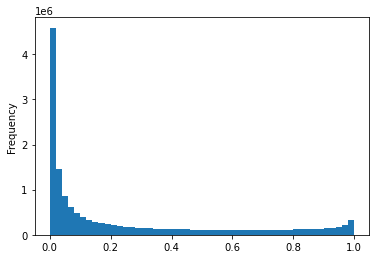

In [54]:
summary['watch_ratio'].plot.hist(bins=50)

In [58]:
len(summary)

15175833

In [62]:
df_types=0
tt=0

In [56]:
summary_2

,time,user,item,est_length,watch_ratio
6643244,2010-07-09 12:34:35,00101111100110100011000001011101,父辈的旗帜(高清).mp4,0 days 01:33:01,0.010572
14633928,2010-07-15 12:31:22,00101111100110100011000001011101,硫磺岛来信(高清).mp4,0 days 01:33:09,0.992664
24028114,2010-07-02 19:22:52,00101111100110100100000001010101,世界杯100609热身赛西班牙6-0波兰.mp4,0 days 00:22:16,0.159431
5621072,2010-07-08 15:41:33,00101111100110100100000001101000,少女杀手阿墨2爱与死.mp4,0 days 01:31:21,0.247765
325620,2010-06-24 00:00:19,00111010000100000000000100000010,工行去年管理费用1017亿 超86个国家GDP-6月21日.mp4,0 days 00:02:22,0.007042
...,...,...,...,...,...
7146732,2010-07-09 16:37:15,11011110111110011111001000010001,最终兵器彼女.mp4,0 days 01:32:14,0.279545
7152630,2010-07-09 17:03:02,11011110111110011111001000010001,这个男人来自地球(高清).mp4,0 days 01:31:34,0.001456
7152667,2010-07-09 17:03:10,11011110111110011111001000010001,星际迷航11DVD.mp4,0 days 01:30:02,0.000555
7152679,2010-07-09 17:03:13,11011110111110011111001000010001,星舰迷航9：起义BD.mp4,0 days 01:40:15,0.000499


In [75]:
summary2=summary.drop(summary[summary.est_length.isnull()].index)

In [59]:
summary_2.to_pickle('0to22data_by_types_0.80.pkl')

In [60]:
summary['watch_ratio'].mean()

0.24726018064168157

In [61]:
summary['watch_ratio'].std()

0.3135912158523903

In [62]:
item_len['est_length'].mean()

Timedelta('0 days 00:28:21.265551427')

In [76]:
summary2['interval'].mean()

Timedelta('0 days 00:09:26.412121169')

In [67]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(summary.sort_values(by=['interval'],ascending=False).tail(1000))

,time,user,item,Series,Shows,Videos,Movies,interval,series_name,est_length,watch_ratio
14238411,2010-07-14 08:46:48,01110010100001110010110011000000,宫(第12集).mp4,True,False,False,False,-20 days +13:27:52,宫,NaT,NaN
15457856,2010-07-15 22:43:38,11011010010111110001101111101111,聊斋3(第04集).mp4,True,False,False,False,-20 days +13:26:23,聊斋3,NaT,NaN
15145958,2010-07-15 19:01:36,01110011100101010110101001000111,聊斋3(第01集).mp4,True,False,False,False,-20 days +13:24:11,聊斋3,NaT,NaN
14443569,2010-07-14 23:36:13,01110010010111101000111010001100,聊斋3(第01集).mp4,True,False,False,False,-20 days +13:19:53,聊斋3,NaT,NaN
15652606,2010-07-15 20:16:17,01110010010111000010110001011110,X特工(第25集).mp4,True,False,False,False,-20 days +13:19:05,X特工,NaT,NaN
13184721,2010-07-14 00:22:44,11011110100000110100011000101111,X特工(第06集).mp4,True,False,False,False,-20 days +13:15:39,X特工,NaT,NaN
15050039,2010-07-15 11:18:50,11011110010001011010000100010110,聊斋3(第04集).mp4,True,False,False,False,-20 days +13:15:13,聊斋3,NaT,NaN
13686449,2010-07-14 22:31:04,01110001110000100101000101010011,吴建豪否认吸毒.mp4,False,False,False,True,-20 days +13:14:41,吴建豪否认吸毒.mp4,NaT,NaN
15520222,2010-07-15 09:11:54,01101111010011011111000100000111,X特工(第25集).mp4,True,False,False,False,-20 days +13:13:41,X特工,NaT,NaN
14233256,2010-07-14 07:20:36,01110101001010101111000101111101,X特工(第01集).mp4,True,False,False,False,-20 days +13:11:26,X特工,NaT,NaN
